In [1]:
# Numerical libs
import numpy as np
import pandas as pd

# ML libs
from sklearn.model_selection import train_test_split

# Plotting libs
import matplotlib.pyplot as plt
import seaborn as sns
# Utils
import os

# Load data

In [2]:
datafile = os.path.join("..", "data", "hypothyroid2.csv")
df = pd.read_csv(datafile)

In [3]:
df.shape

(3772, 30)

In [4]:
df.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [5]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


# Data preprocessing

- [wikipedia](https://en.wikipedia.org/wiki/Data_pre-processing)
- https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825
- https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/
- https://www.youtube.com/watch?v=zVImIQuqjQ0&list=PLzH6n4zXuckpfMu_4Ff8E7Z1behQks5ba&index=5

**Data types**
- Categorical (binary, multiple classes). Ex: days in a week, sex
- Numerical (continuous, integer-valued). Ex: measurements, age

**Problems with data**
> Garbage in, garbage out

- Usually the data is messy and problematic. We might get missing values, impossible values, duplicate values where it shouldn't happen etc. 
- It's our job to clean the data and prepare it for our model.
- The better the data we feed to the model, the better the model will be

## Data cleaning

### Human / Expert cleaning

Usually the human can analyze the dataset and see if there is something wrong.

- For example `age` shouldn't be an absurd number (such as 400) nor negative (-2).
- `TTL` shouldn't be negative

If we have domain knowledge we can use it to clear (drop rows) / replace these values.

In [6]:
# We can see that our dataset contains ages that are too big. Let's clear these
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [7]:
#Get the wrong values
df[df['age'] > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
1364,455.0,F,f,f,f,f,f,f,f,f,...,t,118.0,t,1.13,t,104.0,f,NaN,SVI,negative


In [8]:
#drop them
df = df.drop(df[df['age'] > 100].index)

In [9]:
df[df['age'] > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class


In [10]:
# TSH can be a maximum of 450. Drop the values above that

In [11]:
df[df['TSH'] > 450]['TSH']

1165    478.0
2507    472.0
2772    468.0
3449    530.0
Name: TSH, dtype: float64

In [12]:
print(df.shape)
df = df.drop(df[df['TSH'] > 450].index)
print(df.shape)

(3771, 30)
(3767, 30)


### Missing data

Datasets might have some missing data in them. 
- When it comes to almost empty columns (features) we drop those. 
- When it comes to rows we have 2 options: 
    1. We drop the missing rows
    2. We try to fill them

Let's talk about filling the rows. *How should we fill them?*
- Zero (not reccomended)
- Estimate from the distribution 
- Mean
- Median


#### Pandas methods to check for missing data

In [13]:
df.isna() # Or df.isnull()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
3768,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3769,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
np.all(df.isna() == df.isnull())

True

In [15]:
# Let's get the missing values / feature
df.isna().sum()

age                             1
sex                           149
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            768
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3767
referral_source                 0
Class         

In [16]:
# We can see that TBG columns is almost empty so let's drop it
df = df.drop(['TBG'], axis = 1)

In [17]:
# Let's drop the rows that don't have the sex attribute since we can't fill them

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
print(df.shape)
df = df.dropna(subset = ['sex'])
print(df.shape)

(3767, 29)
(3618, 29)


In [18]:
# We shall fill the rest

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
df = df.fillna(df.mean())

C:\Users\ZademnW\AppData\Local\Temp/ipykernel_11216/1171242899.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [19]:
df.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
Class                        0
dtype: int64

In [20]:
sum(df['sex'] == 'M'), sum(df['sex'] == 'F')

(1142, 2476)

In [21]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,2.500000,t,125.0,t,1.14000,t,109.000000,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.000000,t,102.0,f,0.99531,f,110.357701,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,2.011113,t,109.0,t,0.91000,t,120.000000,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.900000,t,175.0,f,0.99531,f,110.357701,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.200000,t,61.0,t,0.87000,t,70.000000,f,SVI,negative


## Encoding

Data usually comes in 2 types
1. Numerical data $\to$ Continuous variables
2. Categorical data $\to$ Discrete variables
    - 2 Classes $\to$ Binary data
    - Multiple classes

Sometimes we need to encode this data to numerical data for our algorithm to eat it

### Ordinal Encoding

Each category will get its own number
`['value0', 'value1', 'value2', 'value0', 'value2'] -> [0, 1, 2, 0, 2]`

**Pros and cons**
- $+$ Simple, short
- $-$ The variables are mapped from a space with no order $\to$ a space with order (The number line)
    - This may make some algorithms interpret it as such
    - It might not be a true representation of data
    
Examples: 
- Price: `[cheap, affordable, expensive] ->  [0, 1, 2]` is a good representation
- Animal type: `[mammal, insect, bird]` -> [0, 1, 2]` is not a good one

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
enc = OrdinalEncoder()
enc.fit(df[['sex']])
enc.categories_

[array(['F', 'M'], dtype=object)]

In [24]:
enc.transform(df[['sex']])

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

### One-hot encoding

Each variable will be encoded with an array of 0s and a 1 that represents the category
```
['value0', 'value1', 'value2', 'value0', 'value2'] -> 
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
[1, 0, 0]
[0, 0, 1]
```

**Pros and cons**
- $+$ Simple
- $+$ Keeps the variables separated
- $-$  expensive -> big dimensions
- $\pm$ Sparse (depends on algorithm)


In [25]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(df[['sex']])
enc.categories_

[array(['F', 'M'], dtype=object)]

In [26]:
enc.transform(df[['sex']]).toarray()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

### Back to our data

In [27]:
for feature in df:
    if df[feature].dtype != 'float64':        
        print(feature, np.unique(df[feature]))


sex ['F' 'M']
on_thyroxine ['f' 't']
query_on_thyroxine ['f' 't']
on_antithyroid_medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
I131_treatment ['f' 't']
query_hypothyroid ['f' 't']
query_hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH_measured ['f' 't']
T3_measured ['f' 't']
TT4_measured ['f' 't']
T4U_measured ['f' 't']
FTI_measured ['f' 't']
TBG_measured ['f']
referral_source ['STMW' 'SVHC' 'SVHD' 'SVI' 'other']
Class ['compensated_hypothyroid' 'negative' 'primary_hypothyroid'
 'secondary_hypothyroid']


In [28]:
# Let's drop the referral source and TBG measures since they seem to be meaningless
df = df.drop(['TBG_measured', 'referral_source'], axis = 1)

In [29]:
df_enc = df.copy()

In [30]:
for feature in df_enc:
    if df_enc[feature].dtype != 'float64':
        enc = OrdinalEncoder()
        df_enc[feature] = enc.fit_transform(df_enc[[feature]])

In [31]:
df_enc.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,Class
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.30,1.0,2.500000,1.0,125.0,1.0,1.14000,1.0,109.000000,1.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.10,1.0,2.000000,1.0,102.0,0.0,0.99531,0.0,110.357701,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.98,0.0,2.011113,1.0,109.0,1.0,0.91000,1.0,120.000000,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,1.0,1.900000,1.0,175.0,0.0,0.99531,0.0,110.357701,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.72,1.0,1.200000,1.0,61.0,1.0,0.87000,1.0,70.000000,1.0


# Feature explanation

In [32]:
from sklearn.datasets import load_wine

In [33]:
#data = load_iris(as_frame=True)
data = load_wine(as_frame=True)
X, y = data['data'], data['target']
df_wine = pd.concat([X, y], axis = 1)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Pair plots

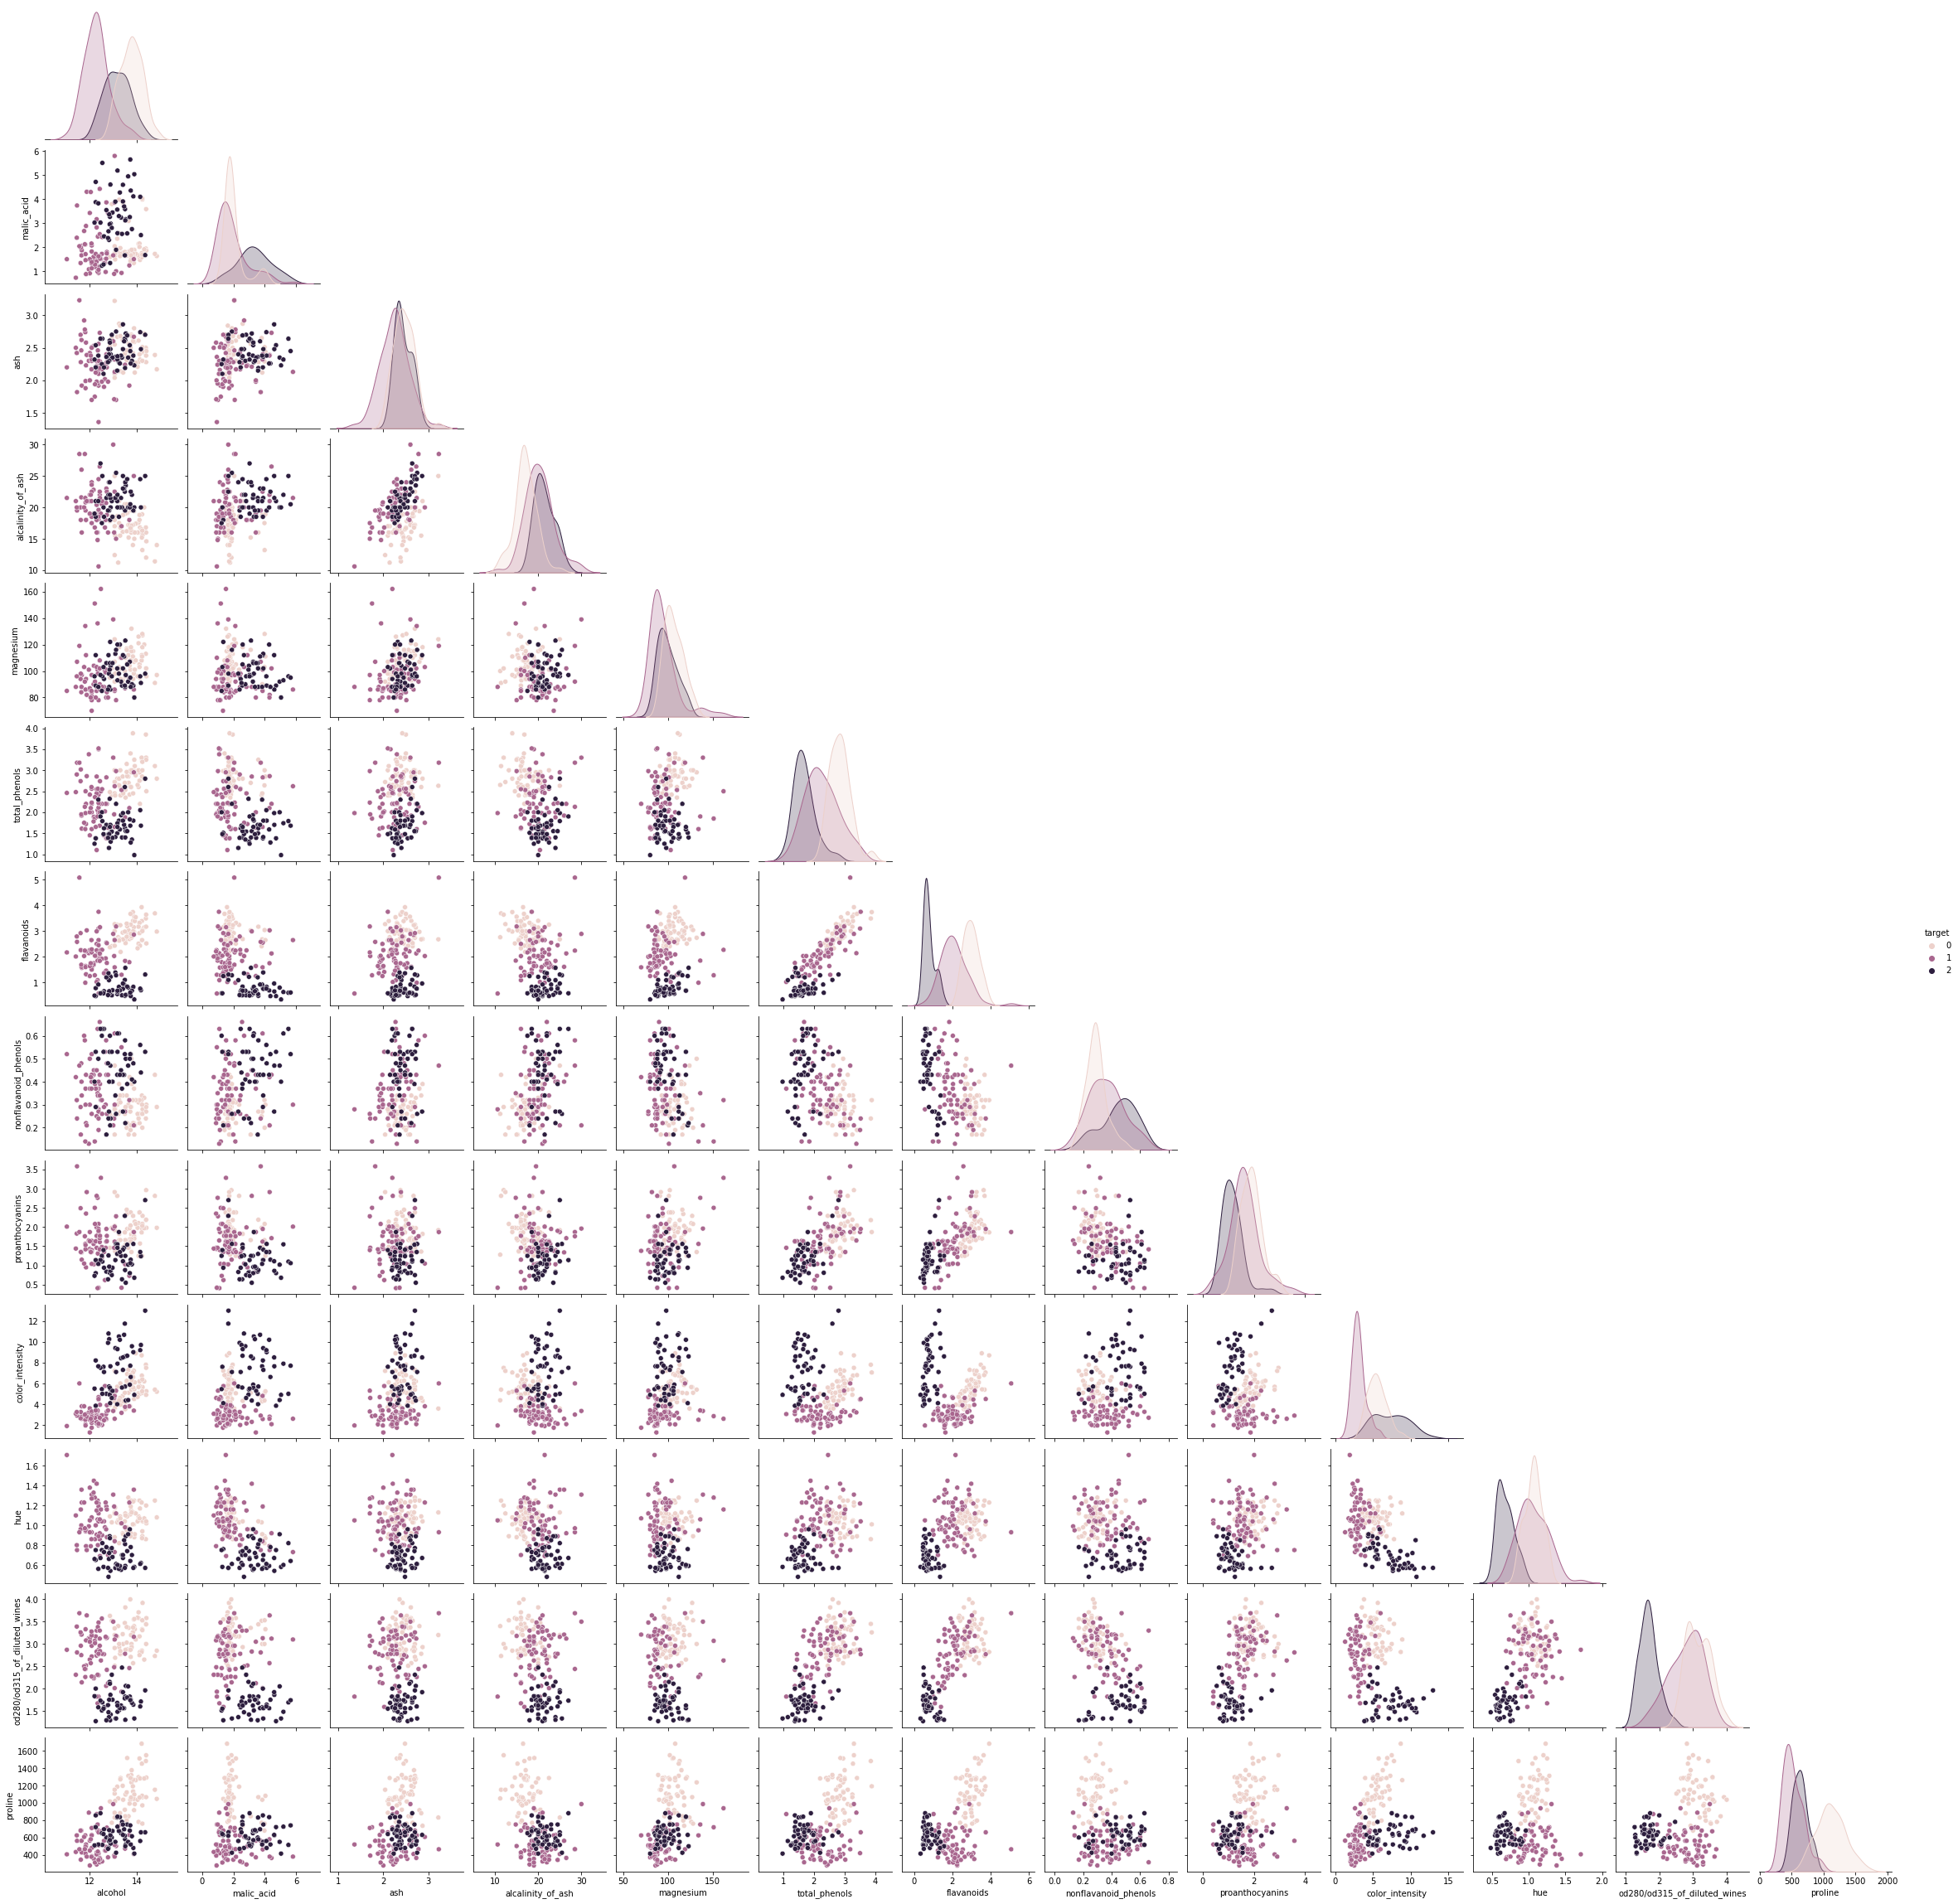

In [111]:
sns.pairplot(df_wine, hue = 'target', corner=True)
plt.show()

### Correlation matrix

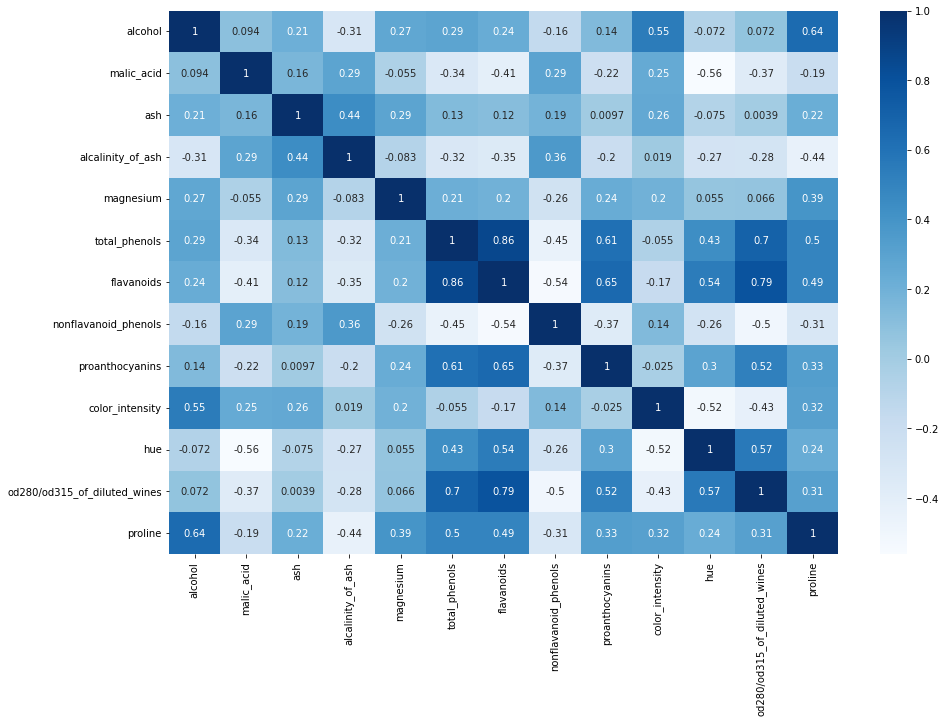

In [34]:
plt.figure(figsize =(15, 10))
sns.heatmap(df_wine.drop('target', axis = 1).corr(), annot = True, cmap='Blues')
plt.show()

### Decision trees

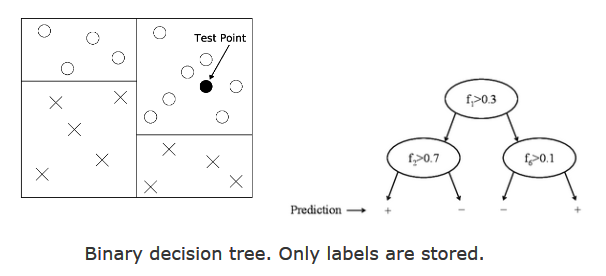

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [36]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

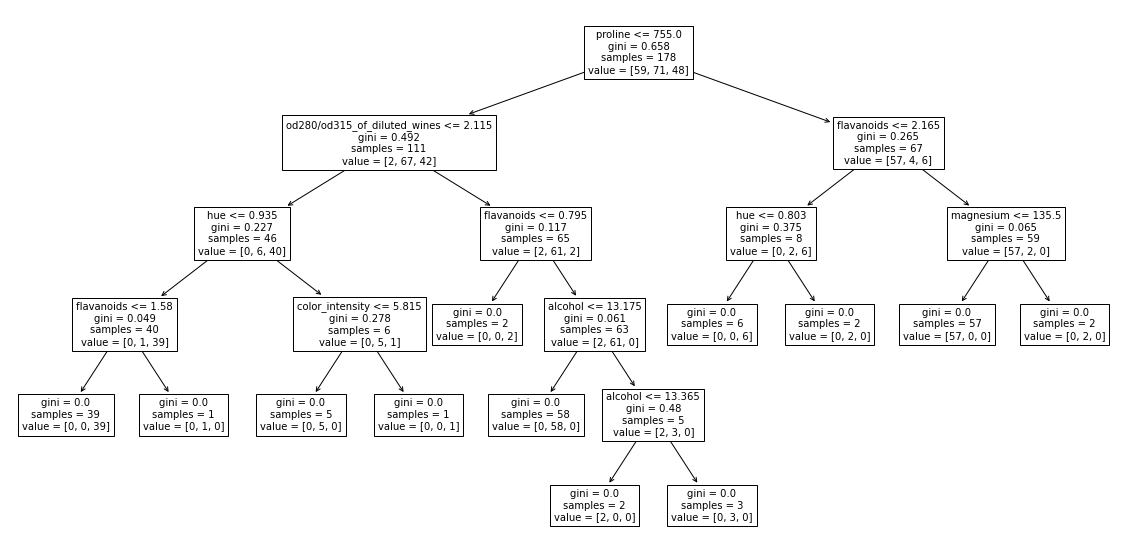

In [60]:
plt.figure(figsize = (20, 10))
plot_tree(model, feature_names=df_wine.columns, fontsize=10)
plt.show()


In [38]:
fimp_df = pd.DataFrame({"feature_names": X.columns, "feature_importance": model.feature_importances_}).sort_values(by = "feature_importance", ascending=False)

fimp_df[fimp_df['feature_importance'] > 10e-5]

,feature_names,feature_importance
12,proline,0.382470
11,od280/od315_of_diluted_wines,0.312043
6,flavanoids,0.141447
10,hue,0.083787
0,alcohol,0.033052
4,magnesium,0.032978
9,color_intensity,0.014223


# Feature selection

## Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
X = df_enc.drop(['Class'], axis = 1)
y = df_enc['Class'] # the target value are the class columns

tree = DecisionTreeClassifier(random_state=420) 
tree.fit(X, y)

DecisionTreeClassifier(random_state=420)

In [63]:
fimp_df = pd.DataFrame({"feature_names": X.columns, "feature_importance": tree.feature_importances_}).sort_values(by = "feature_importance", ascending=False)

fimp_df[fimp_df['feature_importance'] > 10e-5]

,feature_names,feature_importance
17,TSH,0.591264
25,FTI,0.177275
2,on_thyroxine,0.132206
21,TT4,0.042333
7,thyroid_surgery,0.030891
19,T3,0.008398
20,TT4_measured,0.004998
23,T4U,0.003818
0,age,0.003699
9,query_hypothyroid,0.002559


## K best

**Chi2**
- https://www.youtube.com/watch?v=2QeDRsxSF9M

In [64]:
from sklearn.feature_selection import SelectKBest, chi2

In [65]:
X = df_enc.drop(['Class'], axis = 1)
y = df_enc['Class'] # the target value are the class columns

In [66]:
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)

SelectKBest(k=3, score_func=<function chi2 at 0x0000013427466160>)

In [67]:
X_new = X.iloc[:, selector.get_support(indices=True)]
X_new

,TSH,TT4,FTI
0,1.300000,125.000000,109.000000
1,4.100000,102.000000,110.357701
2,0.980000,109.000000,120.000000
3,0.160000,175.000000,110.357701
4,0.720000,61.000000,70.000000
...,...,...,...
3767,4.558648,108.274566,110.357701
3768,1.000000,124.000000,114.000000
3769,5.100000,112.000000,105.000000
3770,0.700000,82.000000,87.000000


### Test the selected features

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=420)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_new, y, test_size=0.33, random_state=420)

In [70]:
np.all(X_train.index == X2_train.index)

True

In [71]:
reg1 = LogisticRegression(random_state=420)
reg1.fit(X_train, y_train)

reg2 = LogisticRegression(random_state=420)
reg2.fit(X2_train, y2_train)

G:\Conda3\envs\pytorch_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Conda3\envs\pytorch_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LogisticRegression(random_state=420)

In [72]:
print(f"Accuracy with all features: {reg1.score(X_test, y_test)}")
print(f"Accuracy with selected features: {reg2.score(X2_test, y2_test)}")

Accuracy with all features: 0.948073701842546
Accuracy with selected features: 0.9447236180904522


In [73]:
#Tree 
tree1 = DecisionTreeClassifier(random_state=420)
tree1.fit(X_train, y_train)
tree2 = DecisionTreeClassifier(random_state=420)
tree2.fit(X2_train, y2_train)
print(f"Accuracy with all features: {tree1.score(X_test, y_test)}")
print(f"Accuracy with selected features: {tree2.score(X2_test, y2_test)}")

Accuracy with all features: 0.9949748743718593
Accuracy with selected features: 0.97571189279732
